## Task 1: Exploratory Data Analytics
### Data Collection

In [112]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt    #For plotting.


train_df = pd.read_csv("train.csv")            #Can include stop words here

def extract_features(fitting_var):
    cv_all_articles = CountVectorizer(min_df=0.20)
    cv_all_articles.fit(fitting_var)
    vec = cv_all_articles.transform(fitting_var)
    matrix = vec.toarray()              #Each row an article, each column a word.
    word_bank = cv_all_articles.get_feature_names_out()
    frequencies = matrix.sum(axis=0)    #Each column represents the frequency of a word in our articles
    return matrix, word_bank, frequencies, cv_all_articles


y = train_df["Category"].to_numpy()
unique_classes = np.unique(y)
print("Unique classes:", unique_classes)

# print(matrix)
# print(word_bank)
# print(frequencies)



Unique classes: ['entertainment' 'tech']


### Task 1 A
#### Report number of articles, number of extracted features and 5 example articles

In [113]:
# Now get five example articles (Q1 a))

X, whole_word_bank, whole_frequencies, cv = extract_features(train_df['Text'])

print("Number of articles: ", X.shape[0])
print("Number of features: ", X.shape[1])

for i in range(5):
    matrix, word_bank, frequencies, vectoriser = extract_features([train_df['Text'][i]])
    print(f"Article: {i+1} has features \n{word_bank}\n\n")
    print(word_bank.size)
    
    





Number of articles:  428
Number of features:  60
Article: 1 has features 
['000' '14' '2003' '25' '29' '45' 'able' 'across' 'activity' 'advisor'
 'ageing' 'ago' 'almost' 'alone' 'also' 'although' 'always' 'among'
 'analogue' 'another' 'bbc' 'behind' 'better' 'birthdays' 'bjorn' 'bought'
 'camera' 'cameras' 'capture' 'change' 'changed' 'chat' 'children' 'chip'
 'choice' 'consumer' 'consumers' 'contact' 'contrast' 'convenient' 'could'
 'customers' 'depth' 'desire' 'devices' 'diaries' 'diary' 'different'
 'digital' 'divide' 'dr' 'drive' 'dubbed' 'early' 'encouraged' 'end'
 'enterprise' 'equipped' 'ericsson' 'especially' 'europe' 'european'
 'even' 'events' 'everyday' 'exactly' 'example' 'factor' 'far' 'faster'
 'figure' 'film' 'firms' 'fit' 'fits' 'five' 'flop' 'focus' 'form'
 'friends' 'funkier' 'get' 'going' 'good' 'governing' 'governs'
 'gradually' 'groups' 'habits' 'handset' 'handsets' 'hardware' 'help'
 'helps' 'historically' 'holidays' 'however' 'imply' 'industry'
 'innovation' 'inn

### Task 1 B
#### i) Top 50 Frequency plot

[36 35 30 33  5 14 58 29 49 27 57  8  9 15 48 43 39 25 32 24 41 46 50 22
 26 56 10 21 47 52 59 17 45  7 51  0 53 42 54 23  2 11 18 55 31 38  3 40
 28  4]
Rank. word: frequency
1. said: 1357
2. people: 612
3. new: 500
4. one: 479
5. also: 479
6. film: 462
7. year: 442
8. music: 413
9. us: 411
10. mr: 408
11. would: 374
12. best: 361
13. could: 322
14. first: 306
15. uk: 297
16. time: 271
17. show: 271
18. many: 259
19. number: 257
20. make: 253
21. technology: 250
22. tv: 246
23. use: 241
24. like: 239
25. million: 229
26. world: 222
27. digital: 221
28. last: 220
29. two: 217
30. users: 214
31. years: 212
32. get: 198
33. top: 195
34. bbc: 189
35. used: 183
36. 000: 179
37. way: 178
38. three: 173
39. well: 172
40. made: 169
41. 2004: 161
42. director: 155
43. go: 152
44. work: 141
45. next: 141
46. set: 140
47. according: 138
48. take: 138
49. much: 135
50. already: 133


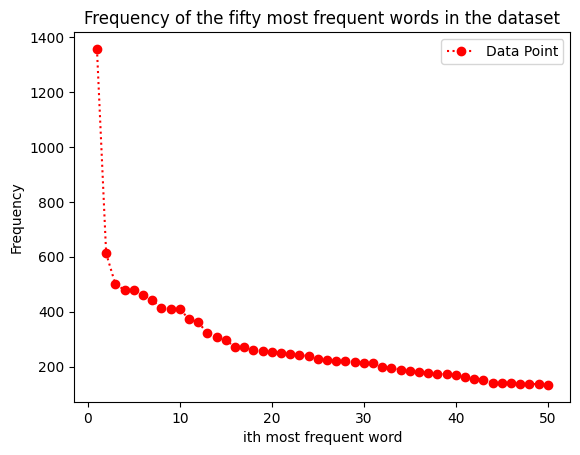

In [114]:
#Get the top 50 terms in the entire dataset
indices_50 = whole_frequencies.argsort()[-50:][::-1] #Get the indices of the top 50 terms
print(indices_50)

top_50_features = whole_word_bank[indices_50] #Get the top 50 features
top_50_feature_frequencies = whole_frequencies[indices_50] #Get the frequencies of the top 50 features

print("Rank. word: frequency")
for i in range(top_50_features.size):
    print(f"{i+1}. {top_50_features[i]}: {top_50_feature_frequencies[i]}") #Print the top 50 features and their frequencies

#Now we can plot the top 50 features with their frequencies
plt.plot()

plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", label="Data Point")
plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset")
plt.show()

#### ii) Frequency distribution for features for each class

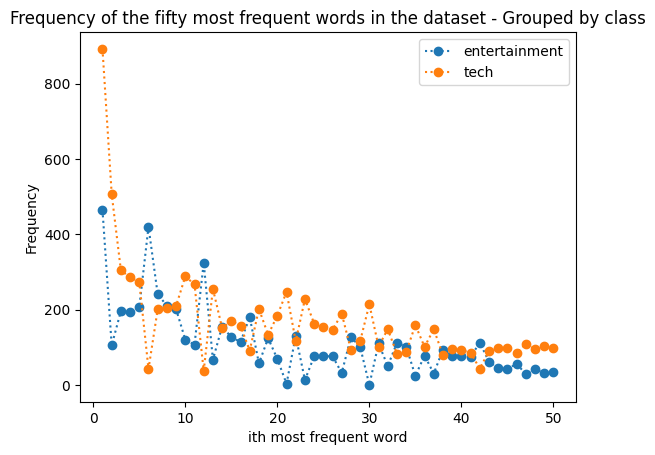

In [115]:
# code for task 1 b/ii
# Assuming this is using the above words, and getting their frequencies for each class



# Get the frequencies of the top 50 features for each class

plt.plot()

for class_name in unique_classes:
    #Get indices (Rows) of the matrix which corresonds to current class
    class_indices = np.where(y == class_name)[0]
    #Now get the frequencies of the top 50 features for this class
    class_frequencies_ii = X[class_indices][:, indices_50].sum(axis=0) # Sum the frequencies of the correct rows and columns
    plt.plot([i+1 for i in range(50)], class_frequencies_ii, linestyle=':', marker='o', label=class_name)

plt.xlabel('ith most frequent word')
plt.ylabel("Frequency")
# plt.plot([i+1 for i in range(50)], top_50_feature_frequencies, linestyle = ':', marker='o', color="r", alpha=0.4, label="Data Point") Overlay plot i)
plt.legend()
plt.title("Frequency of the fifty most frequent words in the dataset - Grouped by class")
plt.show()
        


#### iii) Class distribution - plot frequency of classes.

216 212


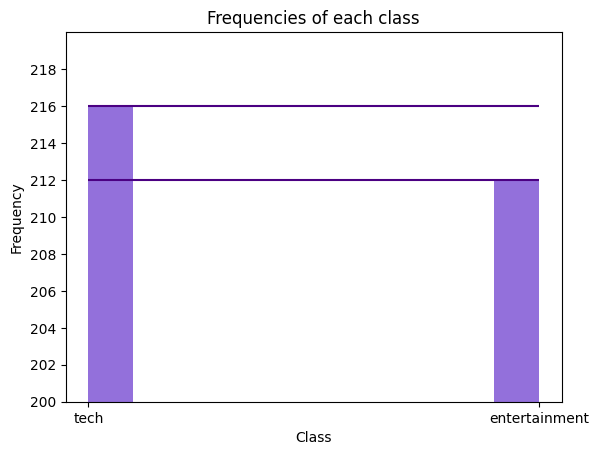

In [116]:
# code for task 1 b/iii
plt.hist(y, color="mediumpurple")
print(np.count_nonzero(y[y == "tech"]), np.count_nonzero(y[y == "entertainment"]))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Frequencies of each class")
plt.yticks(np.arange(0,220, step=2))
plt.ylim(200, 220)
plt.hlines(216, xmin=0, xmax=1, colors="indigo")
plt.hlines(212, xmin=0, xmax=1, colors="indigo")
plt.show()
 

In [117]:
# get test data
test_df = pd.read_csv('test.csv')
test_y = test_df["Category"].to_numpy()
test_X = cv.transform(test_df['Text']).toarray()


## Task 2: Classification Models Learning
### Task 2 A
#### Naive Bayes Classifier
#### i) Report top 20 most identifiable words that are most likely to occur in the articles over two classes

In [118]:
# code for task 2 a/i

#### ii) Report the top 20 words that maximise the the probability quantity P(Xw = 1|Y = y)/P(Xw = 1| Y != y). Which list of words describe the 2 classes better?

In [119]:
# code for task 2 a/ii

### Task 2 B
#### K-Nearest Neighbours Classifier
#### Report surface plot of the kNN with your choice of hyperparameters k and distance metric. Explain the impact of k and the distance metric on the decision boundary.

In [120]:
# code for task 2 b
# for surface plots check note on assignment pdf at bottom of task 2

### Task 2 C
#### Support Vector Machines
#### i) Soft margin linear kernel SVM
#### Report surface plot and explain the impact of the penalty C hyperparameter

In [121]:
# code for task 2 C soft margin linear kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

#### ii) Hard margin RBF kernel SVM
#### Report surface plot and explain the impact of the kernel width hyperparameter

In [122]:
# code for task 2 C hard margin rbf kernel svm
# for surface plots check note on assignment pdf at bottom of task 2

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# create hard margin rbf SVM, high C for hard margin
# gamma is kernel width, auto sets to 1/# of features
rbf = SVC(kernel='rbf', C=1e10, gamma='auto')
rbf.fit(X, y)
pred_y = rbf.predict(test_X)

# temporary accuracy calculation
accuracy = accuracy_score(test_y, pred_y, normalize=True)
print(f"Hard margin RBF kernel SVM accuracy on test set: %{accuracy * 100:.0f}")





Hard margin RBF kernel SVM accuracy on test set: %90


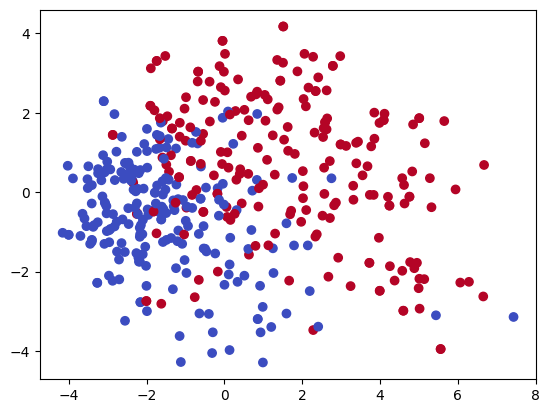

In [127]:
# Plot for ii)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# We will use principal component analysis to reduce the dimensionality of our data.

y_scatter = (y == "tech")
X_bool = (X > 0)

#Scale the data
ss = StandardScaler()
X_scaled = ss.fit_transform(X_bool)

#Now apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:,0], X_pca[:, 1], c=(y=="tech"), cmap='coolwarm')
plt.show()


# plt.scatter(whole_frequencies, y_scatter)

### Task 2 D
#### Neural Network
#### add more details later

In [ ]:
# code for task 2 D neural network